In [29]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf

# The rest of your TensorFlow code


In [30]:
%pip install tensorflow-metal


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 1:
    tf.config.experimental.set_memory_growth(physical_devices[1], True)
    tf.config.set_visible_devices(physical_devices[1], 'GPU')



You should consider upgrading via the '/Users/subahnsh47/Desktop/project/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Num GPUs Available:  1


In [31]:
import glob as gb
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten,experimental,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

In [32]:
df=keras.preprocessing.image_dataset_from_directory(
    directory='PlantVillage/',
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [33]:
df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
class_names=df.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [35]:
len(df)

68

# size

In [36]:
inputsize=256
batch=32
channel=3

In [37]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 0 0 0 2 1 2 0 0 0 1 1 1 0 1 2 0 1 0 0 0 0 1 0 1 0 0 0 0 1]


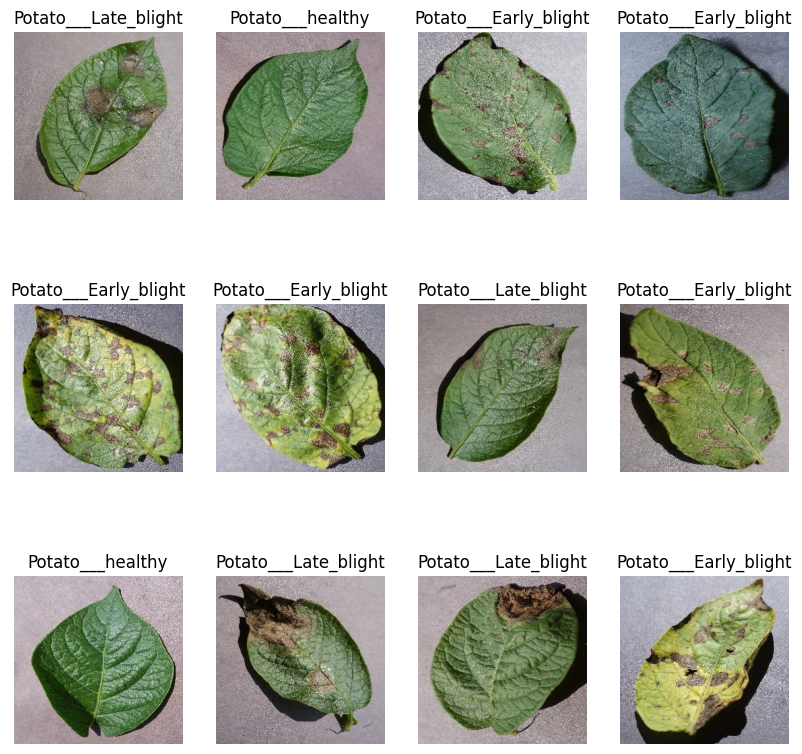

In [62]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in df.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [39]:
train_split=int(len(df)*.80)

In [40]:
trainds=df.take(train_split)

In [41]:
trainds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
testds=df.skip(train_split)

In [43]:
valdf=testds.take(6)
testds=testds.skip(6)

In [44]:
trainds=trainds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valdf=valdf.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testds=testds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [45]:
resize_rescale=Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [46]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
            ])

In [47]:
inp=(batch,inputsize,inputsize,channel)

In [48]:
model=Sequential([
    resize_rescale,
    data_augmentation,
    Conv2D(32,(3,3),activation='relu',input_shape=inp),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
  
    Flatten(),
    Dense(64,activation='relu'),
    Dense(3,activation='softmax')
])

In [49]:
model.build(inp)

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [51]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [52]:
EPOCHS=30

In [53]:
history=model.fit(
    trainds,
    epochs=EPOCHS,
    batch_size=batch,
    validation_data=valdf
)

Epoch 1/30


54/54 [==============================] - 19s 276ms/step - loss: 0.9595 - accuracy: 0.4618 - val_loss: 0.9695 - val_accuracy: 0.4896
Epoch 2/30
54/54 [==============================] - 17s 315ms/step - loss: 0.9201 - accuracy: 0.4618 - val_loss: 0.9568 - val_accuracy: 0.4219
Epoch 3/30
54/54 [==============================] - 23s 423ms/step - loss: 0.8935 - accuracy: 0.5226 - val_loss: 0.9187 - val_accuracy: 0.5260
Epoch 4/30
54/54 [==============================] - 20s 366ms/step - loss: 0.8923 - accuracy: 0.5422 - val_loss: 0.9419 - val_accuracy: 0.4896
Epoch 5/30
54/54 [==============================] - 15s 274ms/step - loss: 0.9091 - accuracy: 0.4878 - val_loss: 0.9219 - val_accuracy: 0.4896
Epoch 6/30
54/54 [==============================] - 16s 297ms/step - loss: 0.9027 - accuracy: 0.6152 - val_loss: 1.5810 - val_accuracy: 0.6510
Epoch 7/30
54/54 [==============================] - 16s 295ms/step - loss: 0.6909 - accuracy: 0.7465 - val_loss: 0.6213 - val_accuracy: 0.7604
Epoch 8/30

In [54]:
import matplotlib.pyplot as plt2

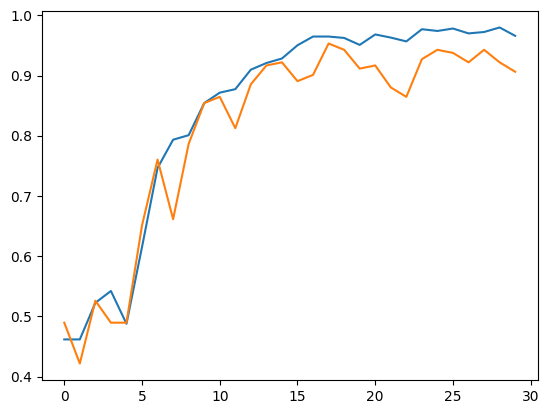

In [55]:
plt2.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

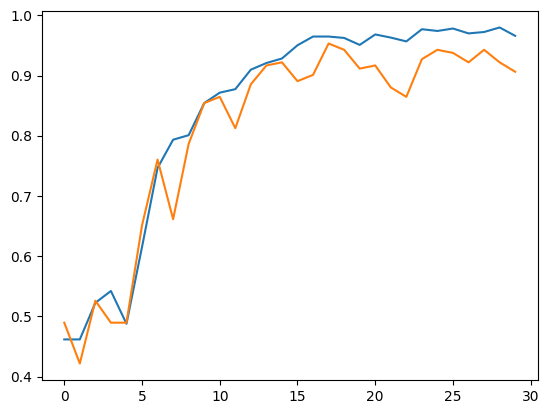

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

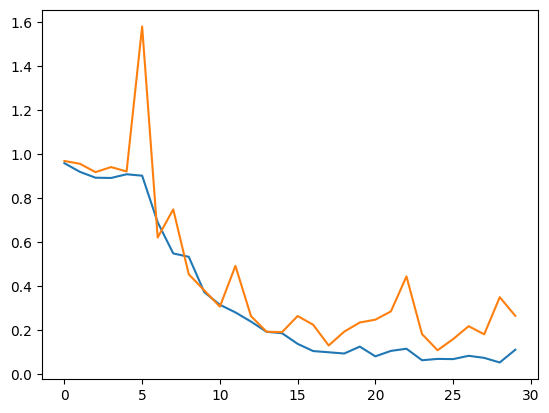

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [58]:
max(history.history['val_accuracy'])

0.953125

In [59]:
model.evaluate(testds)

8/8 [==============================] - 4s 361ms/step - loss: 0.1688 - accuracy: 0.9483


[0.1687500923871994, 0.9482758641242981]

In [60]:
model_version=1
model.save('{model_version}')

INFO:tensorflow:Assets written to: {model_version}/assets


INFO:tensorflow:Assets written to: {model_version}/assets
